Graf je enodelen


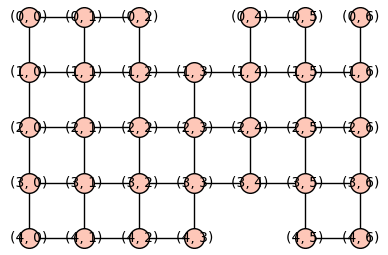

{(0, 0): {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 4): 6, (0, 5): 7, (0, 6): 8, (1, 0): 1, (1, 1): 2, (1, 2): 3, (1, 3): 4, (1, 4): 5, (1, 5): 6, (1, 6): 7, (2, 0): 2, (2, 1): 3, (2, 2): 4, (2, 3): 5, (2, 4): 6, (2, 5): 7, (2, 6): 8, (3, 0): 3, (3, 1): 4, (3, 2): 5, (3, 3): 6, (3, 4): 7, (3, 5): 8, (3, 6): 9, (4, 0): 4, (4, 1): 5, (4, 2): 6, (4, 3): 7, (4, 5): 9, (4, 6): 10}, (0, 1): {(0, 0): 1, (0, 1): 0, (0, 2): 1, (0, 4): 5, (0, 5): 6, (0, 6): 7, (1, 0): 2, (1, 1): 1, (1, 2): 2, (1, 3): 3, (1, 4): 4, (1, 5): 5, (1, 6): 6, (2, 0): 3, (2, 1): 2, (2, 2): 3, (2, 3): 4, (2, 4): 5, (2, 5): 6, (2, 6): 7, (3, 0): 4, (3, 1): 3, (3, 2): 4, (3, 3): 5, (3, 4): 6, (3, 5): 7, (3, 6): 8, (4, 0): 5, (4, 1): 4, (4, 2): 5, (4, 3): 6, (4, 5): 8, (4, 6): 9}, (0, 2): {(0, 0): 2, (0, 1): 1, (0, 2): 0, (0, 4): 4, (0, 5): 5, (0, 6): 6, (1, 0): 3, (1, 1): 2, (1, 2): 1, (1, 3): 2, (1, 4): 3, (1, 5): 4, (1, 6): 5, (2, 0): 4, (2, 1): 3, (2, 2): 2, (2, 3): 3, (2, 4): 4, (2, 5): 5, (2, 6): 6, (3, 0): 5, (3, 1): 4, (

4.0
[(1, 5), (2, 1)]


In [23]:
def mreza1(m,n,a): #funkcija, ki izbriše vozlišče iz grafa
    mreza = graphs.Grid2dGraph(m,n)
    i = 0
    while i < a:
        mreza.delete_vertex(mreza.random_vertex())
        i = i+1
    return mreza

def mreza2(m,n,a): #funkcija, ki izbriše povezavo iz mreže
    mreza = graphs.Grid2dGraph(m,n)
    i = 0
    while i < a:
        mreza.delete_edge(mreza.random_edge())
        i = i+1
    return mreza

def mreza(m,n,a,b): #m x n mreža, a št. izbrisanih vozlov, b št.izrbirsanih povezav
    mreza = graphs.Grid2dGraph(m,n)
    if a > mreza.order():
        print("Za ukaz je na voljo premalo vozlov.")
    else:
        i = 0
        while i < a:
            mreza.delete_vertex(mreza.random_vertex())
            i = i+1
        i = 0
    if b > mreza.size():
        print("Za ukaz je na voljo premalo povezav.")
    else:
        while i < b:
            mreza.delete_edge(mreza.random_edge())
            i = i+1
    return mreza

#G = graphs.Grid2dGraph(3, 3) # mreža 3x3
#G.delete_vertex(G.random_vertex())
#G.delete_edge(G.random_edge())

def enodelengraf(G): #funkcija nam pove ali je graf enodelen ali ne
    razdalje = G.distance_all_pairs()
    nevem = razdalje[(0,0)]
    if len(nevem) == G.order():
        print("Graf je enodelen")
    else:
        print("Graf ni enodelen")
enodelengraf(G)

G = mreza(5,7,2,1)
slika=G.show() #nariše graf G

razdalje = G.distance_all_pairs() #razdalje med vozlišči
print(razdalje)

K = 2
p = MixedIntegerLinearProgram(maximization=False)
x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

p.set_objective(p['R']) # največja razdalja je spremenljivka

for u in G:
    p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

for u in G:
    for v in G:
        p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

for u in G:
    for v in G:
        p.add_constraint((razdalje[u][v] * x[u, v] )<= p['R']) # za vsako obstoječo povezavo med mestom in skladiščem mora veljati, da je ta manjša od R

max_razdalja = p.solve()
print(max_razdalja)


skladisca = [k for k, v in p.get_values(y).items() if v == 1]
print(skladisca)